Set the work envarioment

In [1]:
import os
import sys
from dotenv import load_dotenv

load_dotenv()
work_dir = os.getenv("WORK_DIR")

sys.path.append(work_dir)


Libreries and modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy.orm import sessionmaker, aliased
from src.database.db_connection import get_engine
from src.models.SteamGames_models import Games

C:\Users\manue\AppData\Local\Temp\ipykernel_14752\3541969990.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Conected successfully to database PruebaCarga!


Connection and sessions

In [3]:
connection = get_engine()

Session = sessionmaker(bind=connection)
session = Session()

Conected successfully to database PruebaCarga!


Called to table

In [4]:
table = aliased(Games)
query = session.query(table).statement
games = pd.read_sql(query, connection)

EDA

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85103 entries, 0 to 85102
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AppID                    85103 non-null  int64  
 1   Name                     85097 non-null  object 
 2   ReleaseDate              85103 non-null  object 
 3   EstimatedOwners          85103 non-null  object 
 4   PeakCCU                  85103 non-null  int64  
 5   RequiredAge              85103 non-null  int64  
 6   Price                    85103 non-null  float64
 7   DLCCount                 85103 non-null  int64  
 8   AboutTheGame             81536 non-null  object 
 9   SupportedLanguages       85103 non-null  object 
 10  FullAudioLanguages       85103 non-null  object 
 11  Reviews                  9743 non-null   object 
 12  HeaderImage              85103 non-null  object 
 13  Website                  39452 non-null  object 
 14  SupportUrl            

In [6]:
games_summary = {
    'types': games.dtypes,
    'missing': games.isna().sum(),
    'size': games.shape[0],

}

print(pd.DataFrame(games_summary))

                           types  missing   size
AppID                      int64        0  85103
Name                      object        6  85103
ReleaseDate               object        0  85103
EstimatedOwners           object        0  85103
PeakCCU                    int64        0  85103
RequiredAge                int64        0  85103
Price                    float64        0  85103
DLCCount                   int64        0  85103
AboutTheGame              object     3567  85103
SupportedLanguages        object        0  85103
FullAudioLanguages        object        0  85103
Reviews                   object    75360  85103
HeaderImage               object        0  85103
Website                   object    45651  85103
SupportUrl                object    43517  85103
SupportEmail              object    13596  85103
Windows                     bool        0  85103
Mac                         bool        0  85103
Linux                       bool        0  85103
MetacriticScore     

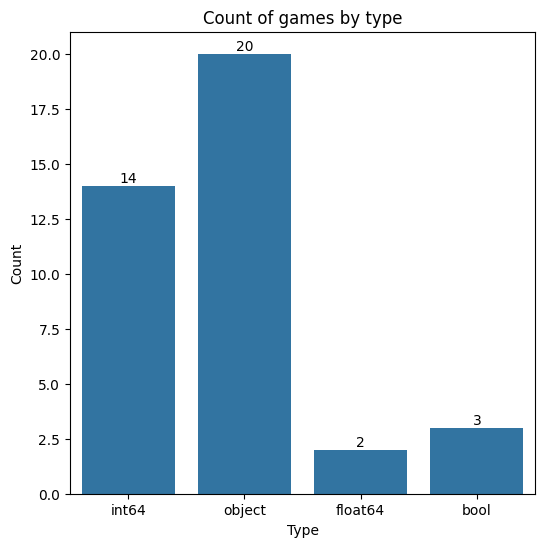

In [7]:
# Crear la gráfica de barras
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='types', data=games_summary)

# Agregar los valores encima de las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Añadir etiquetas y título
plt.title('Count of games by type')
plt.xlabel('Type')
plt.ylabel('Count')

# Mostrar la gráfica
plt.show()

## Columns transformation

Drop columns that we're not going to use

In [8]:
drop_columns = ['ScoreRank', 'Reviews', 'HeaderImage', 'Website', 'SupportUrl', 'SupportEmail', 'MetacriticUrl', 'Screenshots', 'Movies', 'AboutTheGame', 'Notes']
games = games.drop(drop_columns, axis=1)

## Clean columns 

Delete null into Name column

In [9]:
#Delete null names 
games = games.drop(games.loc[games['Name'].isna()].index)
games.isna().sum()

AppID                          0
Name                           0
ReleaseDate                    0
EstimatedOwners                0
PeakCCU                        0
RequiredAge                    0
Price                          0
DLCCount                       0
SupportedLanguages             0
FullAudioLanguages             0
Windows                        0
Mac                            0
Linux                          0
MetacriticScore                0
UserScore                      0
Positive                       0
Negative                       0
Achievements                   0
Recommendations                0
AveragePlaytimeForever         0
AveragePlaytimeTwoWeeks        0
MedianPlaytimeForever          0
MedianPlaytimeTwoWeeks         0
Developers                  3581
Publishers                  3861
Categories                  4595
Genres                      3553
Tags                       21094
dtype: int64

Imputation nulls into Developers column

In [10]:
games['Developers'].fillna('No information about this', inplace=True)

C:\Users\manue\AppData\Local\Temp\ipykernel_14752\643326327.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['Developers'].fillna('No information about this', inplace=True)


Imputation nulls into Publisher column

In [11]:
games['Publishers'].fillna('No information about this', inplace=True)

C:\Users\manue\AppData\Local\Temp\ipykernel_14752\3790923263.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['Publishers'].fillna('No information about this', inplace=True)


Imputation nulls into Categories column

In [12]:
games['Categories'].fillna('No information about this', inplace=True)

C:\Users\manue\AppData\Local\Temp\ipykernel_14752\2916880594.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['Categories'].fillna('No information about this', inplace=True)


Imputation nulls into Genres column

In [13]:
games['Genres'].fillna('No information about this', inplace=True)

C:\Users\manue\AppData\Local\Temp\ipykernel_14752\1267313775.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['Genres'].fillna('No information about this', inplace=True)


Imputation nulls into Tags column

In [14]:
games['Tags'].fillna('No information about this', inplace=True)

C:\Users\manue\AppData\Local\Temp\ipykernel_14752\2246961738.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['Tags'].fillna('No information about this', inplace=True)


In [15]:
games.isnull().sum()

AppID                      0
Name                       0
ReleaseDate                0
EstimatedOwners            0
PeakCCU                    0
RequiredAge                0
Price                      0
DLCCount                   0
SupportedLanguages         0
FullAudioLanguages         0
Windows                    0
Mac                        0
Linux                      0
MetacriticScore            0
UserScore                  0
Positive                   0
Negative                   0
Achievements               0
Recommendations            0
AveragePlaytimeForever     0
AveragePlaytimeTwoWeeks    0
MedianPlaytimeForever      0
MedianPlaytimeTwoWeeks     0
Developers                 0
Publishers                 0
Categories                 0
Genres                     0
Tags                       0
dtype: int64

## Visualitation

Revisar este grafico 


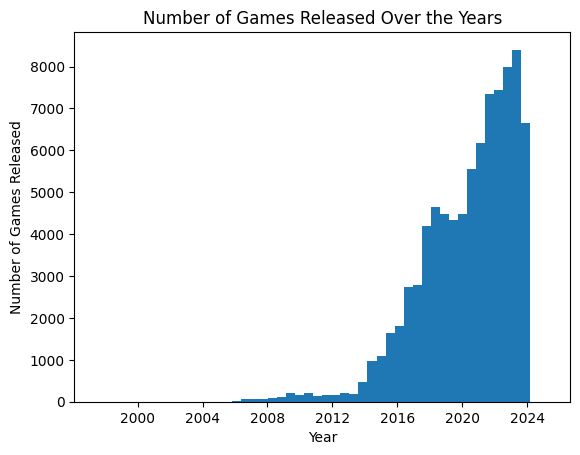

In [16]:
games['ReleaseDate'] = pd.to_datetime(games['ReleaseDate'], format='mixed')

plt.hist(games['ReleaseDate'], bins=50)
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.title('Number of Games Released Over the Years')
plt.show()

In [17]:
games['Price']

0        19.99
1         0.99
2         4.99
3         5.99
4        12.99
         ...  
85098     0.00
85099     0.00
85100     0.00
85101     3.99
85102     9.99
Name: Price, Length: 85097, dtype: float64

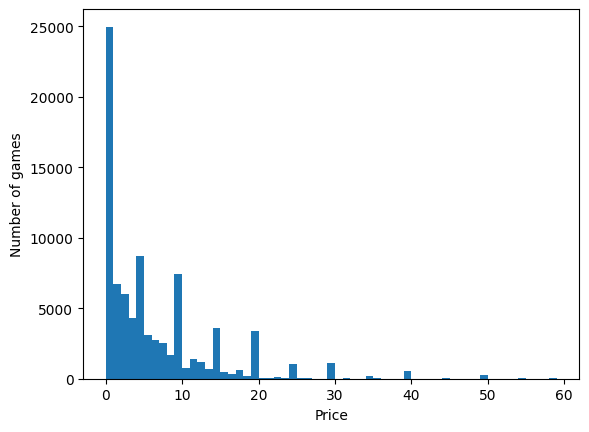

In [18]:
plt.hist(games['Price'], bins=list(range(0, 60)))
plt.xlabel('Price')
plt.ylabel('Number of games')
plt.show()

Visualitation Most Downloades Games

In [19]:
# Extracting the "Estimated owners" column
estimated_owners_column = games["EstimatedOwners"]

# Function to clean ownership ranges and calculate median
def clean_ownership_range(x):
    x = x.strip()
    lower, upper = map(int, x.split("-"))
    median = (upper - lower) / 2
    return median

# Example usage of the clean_ownership_range function
example_cleaned_ownership = clean_ownership_range("0 - 20000")

# Applying the clean_ownership_range function to each row and creating a new column
games['OwnersClean'] = games['EstimatedOwners'].apply(clean_ownership_range)

# Extracting the 'owners_clean' column
cleaned_owners_column = games['OwnersClean']

In [20]:
# Grouping by game name, aggregating the cleaned ownership values, sorting, and selecting top 10
most_downloaded_games = (
    games.groupby("Name")
    .agg({"OwnersClean": "sum"})
    .reset_index()
    .sort_values("OwnersClean", ascending=False)
    .head(10)
)

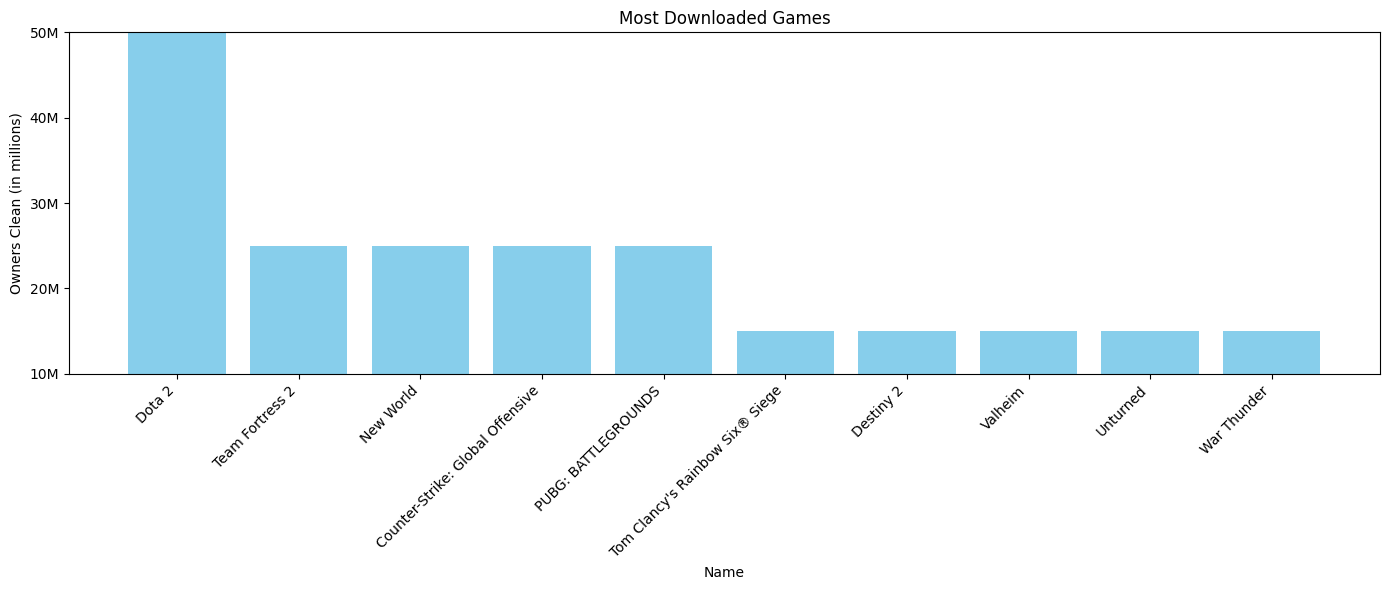

In [21]:
# Llenar los valores nulos en la columna 'Name' sin usar inplace=True
most_downloaded_games['Name'] = most_downloaded_games['Name'].fillna('')

# Ordenar el DataFrame por la columna 'owners clean' para obtener una mejor visualización
games_sorted = most_downloaded_games.sort_values(by='OwnersClean', ascending=False)

# Filtrar los juegos con Owners Clean entre 10M y 50M
filtered_games = games_sorted[(games_sorted['OwnersClean'] >= 10_000_000) & (games_sorted['OwnersClean'] <= 50_000_000)]

# Crear un gráfico de barras
plt.figure(figsize=(14, 6))
bars = plt.bar(filtered_games['Name'], filtered_games['OwnersClean'], color='skyblue')
plt.title('Most Downloaded Games')
plt.xlabel('Name')
plt.ylabel('Owners Clean (in millions)')

# Ajustar la escala del eje y y agregar la letra 'M' a las etiquetas
plt.ylim(10_000_000, 50_000_000)  # Establecer límites del eje y
plt.yticks([10_000_000, 20_000_000, 30_000_000, 40_000_000, 50_000_000], ['10M', '20M', '30M', '40M', '50M'])

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


New Column about Operative System 'OS'

In [22]:
# Función para determinar el sistema operativo
def determine_os(row):
    os_list = []
    if row['Windows']:
        os_list.append('Windows')
    if row['Mac']:
        os_list.append('Mac')
    if row['Linux']:
        os_list.append('Linux')
    return ', '.join(os_list)

# Crear la columna OS utilizando la función determine_os
games['OS'] = games.apply(determine_os, axis=1)

# Mostrar el DataFrame resultante
games.head(1)

,AppID,Name,ReleaseDate,EstimatedOwners,PeakCCU,RequiredAge,Price,DLCCount,SupportedLanguages,FullAudioLanguages,...,AveragePlaytimeTwoWeeks,MedianPlaytimeForever,MedianPlaytimeTwoWeeks,Developers,Publishers,Categories,Genres,Tags,OwnersClean,OS
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,['English'],[],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",10000.0,Windows


In [23]:
downloads_for_os = games.groupby('OS')['OwnersClean'].mean().reset_index()

print(downloads_for_os)

                    OS   OwnersClean
0                Linux   9000.000000
1                  Mac  11041.666667
2           Mac, Linux  25000.000000
3              Windows  28530.074392
4       Windows, Linux  37517.550702
5         Windows, Mac  43457.762852
6  Windows, Mac, Linux  88390.144928


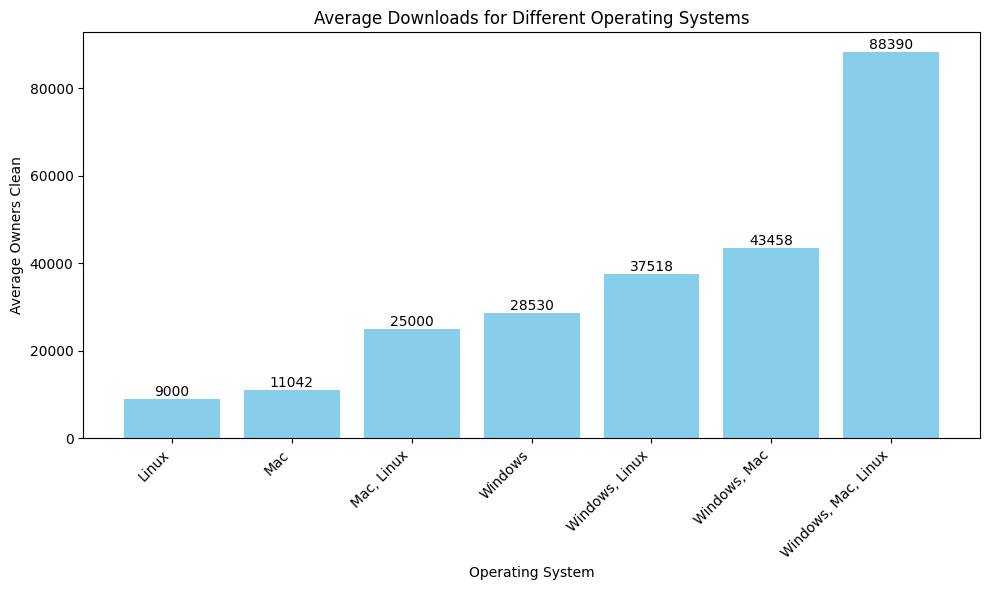

In [24]:
# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(downloads_for_os['OS'], downloads_for_os['OwnersClean'], color='skyblue')
plt.title('Average Downloads for Different Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Average Owners Clean')

# Añadir etiquetas en las barras sin decimales
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(round(yval)), ha='center', va='bottom', color='black', size=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Graph Top 10 Most Expensive Games

In [26]:
most_expensive_games = games.groupby('Name')['Price'].sum().reset_index().sort_values('Price', ascending=False).head(10)

print(most_expensive_games)

                                                    Name   Price
70121                 The Leverage Game Business Edition  999.98
70120                                  The Leverage Game  999.98
4824                   Ascent Free-Roaming VR Experience  999.00
1786                               Aartform Curvy 3D 3.0  299.90
20872                                   EA SPORTS FC™ 24  279.96
32897                                      Houdini Indie  269.99
75588                      VEGAS 19 Edit - Steam Edition  249.00
21181                                  Earthquake escape  199.99
21341           Eco-friendly Car VR Maintenance Training  199.99
75059  Underground roof fall hazard assessment VR Tra...  199.99


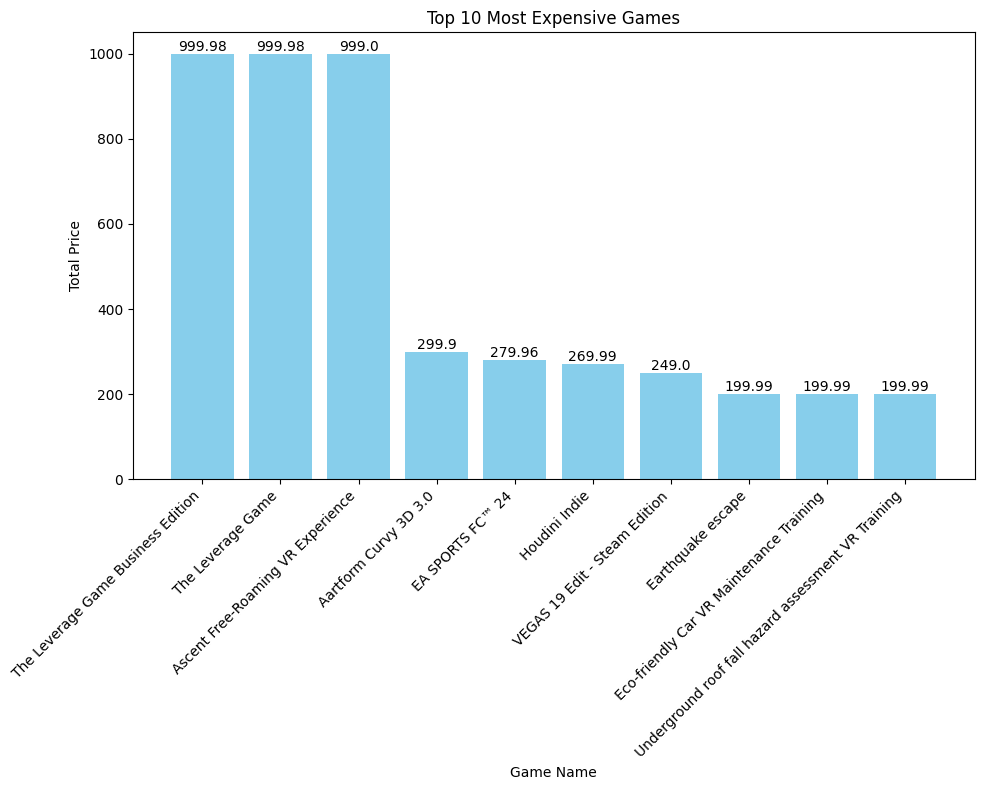

In [27]:
# Crear un gráfico de barras
plt.figure(figsize=(10, 8))
bars = plt.bar(most_expensive_games['Name'], most_expensive_games['Price'], color='skyblue')
plt.title('Top 10 Most Expensive Games')
plt.xlabel('Game Name')
plt.ylabel('Total Price')

# Añadir etiquetas en las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', size=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 10 most frequent categories

In [28]:
def separar_categorias(cadena):
    return cadena.split(',')

# Aplicar la función a la columna 'categories' y luego unir las listas resultantes en una cadena
games['Categories'] = games['Categories'].apply(separar_categorias).apply(', '.join)

In [29]:
def count_categories(games):
    # Dividir las categorías y contar su frecuencia
    categories = games['Categories'].str.split(', ')
    all_categories = [category for sublist in categories.dropna() for category in sublist]
    category_counts = pd.Series(all_categories).value_counts()
    
    return category_counts

# Obtener la frecuencia de las categorías
category_counts = count_categories(games)

# Imprimir la frecuencia de las categorías
print(category_counts.to_string())

Single-player                                                                                                                                                                                                                                                                                                                                                                                              23989
Single-player, Steam Achievements                                                                                                                                                                                                                                                                                                                                                                           8554
No information about this                                                                                                                                                                             

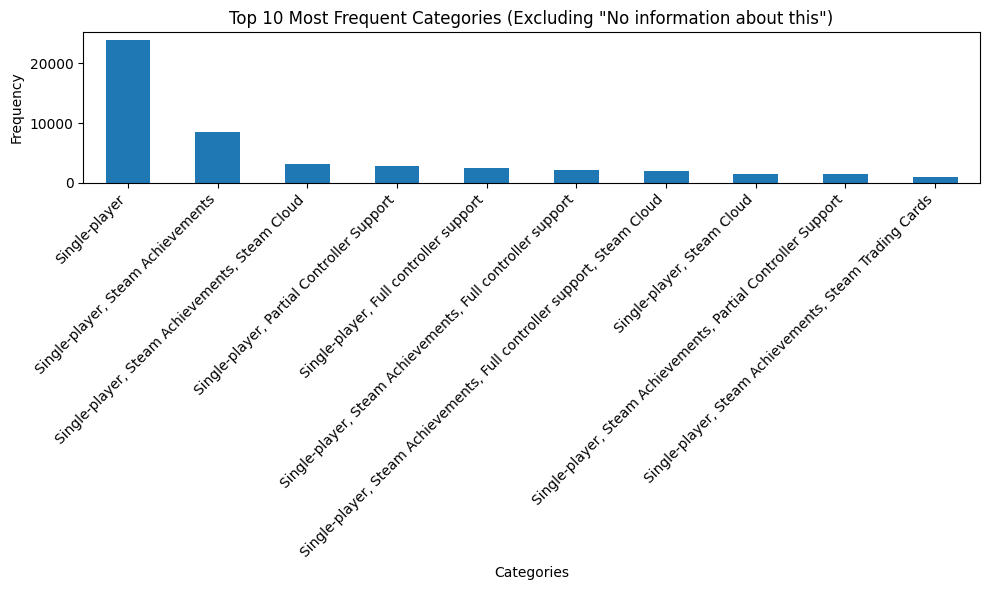

In [30]:
# Stack the categories
games_categories = games['Categories'].str.split(', ', expand=True).stack()

# Exclude the category 'No information about this'
games_categories = games_categories[games_categories != 'No information about this']

# Count the frequency of each individual category
category_frequency = games_categories.value_counts()

# Select the top 10 categories
top_10_categories = category_frequency.head(10)

# Plot the top 10 most frequent categories
plt.figure(figsize=(10, 6))
top_10_categories.plot(kind='bar')
plt.title('Top 10 Most Frequent Categories (Excluding "No information about this")')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


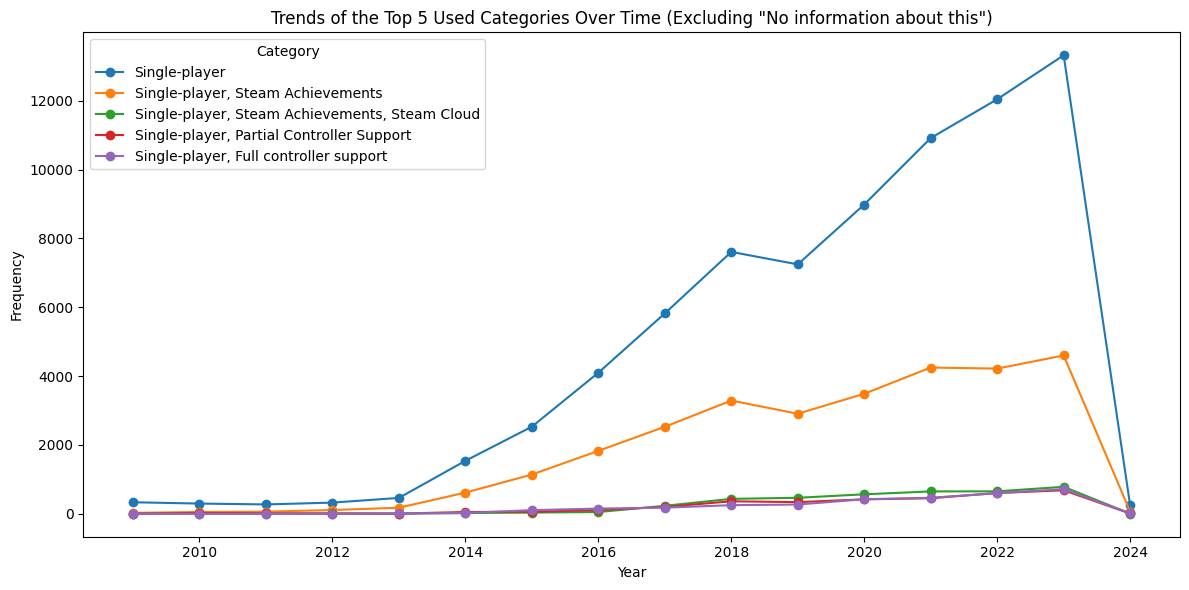

In [31]:
current_year = pd.Timestamp.now().year

# Filter the data for the last 15 years
games_last_15_years = games[games['ReleaseDate'].dt.year >= current_year - 15]

# Calculate the frequency of each category in the last 15 years excluding 'No information about this'
category_counts = games_last_15_years['Categories'].str.split(', ').explode().value_counts()
category_counts = category_counts[category_counts.index != 'No information about this']

# Select the top 5 used categories
top_5_categories = category_counts.head(5)

# Create a list with the names of the top 5 used categories
top_5_category_names = top_5_categories.index.tolist()

# Create a DataFrame to store the trends of the top 5 used categories
trends_top_5_categories = pd.DataFrame(index=range(current_year - 15, current_year + 1))

# Calculate the frequency of each category for each year excluding 'No information about this'
for category_name in top_5_category_names:
    filtered_years = games_last_15_years[games_last_15_years['Categories'].str.contains(category_name) & (games_last_15_years['Categories'] != 'No information about this')]
    trends_top_5_categories[category_name] = filtered_years['ReleaseDate'].dt.year.value_counts().sort_index()

# Plot the trends of the top 5 used categories over time
plt.figure(figsize=(12, 6))
trends_top_5_categories.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Trends of the Top 5 Used Categories Over Time (Excluding "No information about this")')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Category', loc='upper left')
plt.tight_layout()
plt.show()


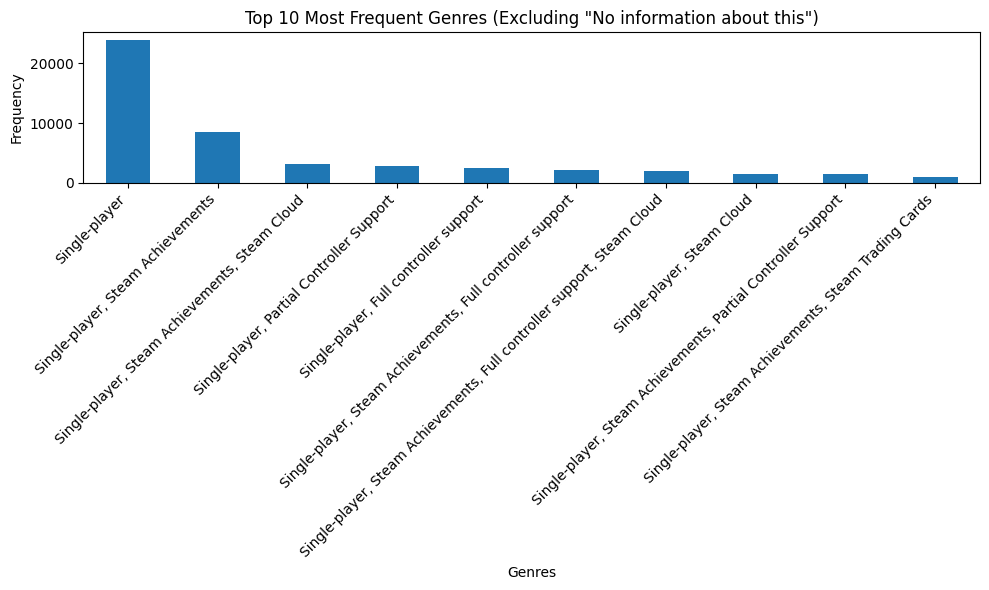

In [32]:
# Obtener la frecuencia de los géneros excluyendo 'No information about this'
genre_counts = count_categories(games)
genre_counts = genre_counts[genre_counts.index != 'No information about this']

# Seleccionar las 10 categorías más frecuentes
top_10_genres = genre_counts.head(10)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
top_10_genres.plot(kind='bar')
plt.title('Top 10 Most Frequent Genres (Excluding "No information about this")')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


SupportedLanguages Column

In [33]:
games['SupportedLanguages']

0                                              ['English']
1        ['English', 'French', 'Italian', 'German', 'Sp...
2                       ['English', 'Portuguese - Brazil']
3        ['English', 'French', 'Italian', 'German', 'Sp...
4               ['English', 'Spanish - Spain', 'Japanese']
                               ...                        
85098                               ['English', 'Finnish']
85099                                          ['English']
85100                                          ['English']
85101                                          ['English']
85102                                          ['English']
Name: SupportedLanguages, Length: 85097, dtype: object

In [34]:
def clean_supported_languages(games):
    games['SupportedLanguages'] = games['SupportedLanguages'].str.replace("]", '') \
        .str.replace("'", "") \
        .str.replace("[", "") \
        .str.replace("]", "") \
        .str.replace("&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;", "")   \
        .str.replace("b/b", "") \
        .str.replace("/b", "")  \
        .str.replace(" \\r\\n\\r\\nb/b ", "") \
        .str.replace("/b", "") \
        .str.replace("\\r\\nb/b", "") \
        .str.replace("\\r\\n", "") \
        .str.replace("#", "") \
        .str.replace("\r\\n\\r\\n", "")     \
        .str.replace("Russian\\r\\nEnglish\\r\\nSpanish - Spain\\r\\nFrench\\r\\nJapanese\\r\\nCzech", "")  \
        .str.replace("\r\\n", "") \
        .str.replace(" &amp;lt;br /&amp;gt;&amp;lt;br /&amp;gt; ", "") \
        .str.replace("RussianEnglishSpanish - SpainFrenchJapaneseCzech", "") \
        .str.lstrip(", ") \
        .str.strip()
    
    return games

games = clean_supported_languages(games)

In [35]:
# Split de la columna SupportedLanguages
df_languages = games['SupportedLanguages'].str.strip("[]").str.split(', ', expand=True)

# Melt para llevar las columnas a filas
df_melted = pd.melt(df_languages, value_name='Language').dropna()['Language'].str.strip("'")

# Contar la frecuencia de cada lenguaje
language_counts = df_melted.value_counts().reset_index()

# Renombrar las columnas
language_counts.columns = ['Language', 'Frequency']

# Mostrar el resultado
language_counts

,Language,Frequency
0,English,78060
1,Simplified Chinese,19306
2,German,18652
3,French,18075
4,Russian,17383
...,...,...
110,"Hungarian,Polish",1
111,Japanese (all with full audio support),1
112,"English,German,Spanish - Spain,lang_français",1
113,Korean,1


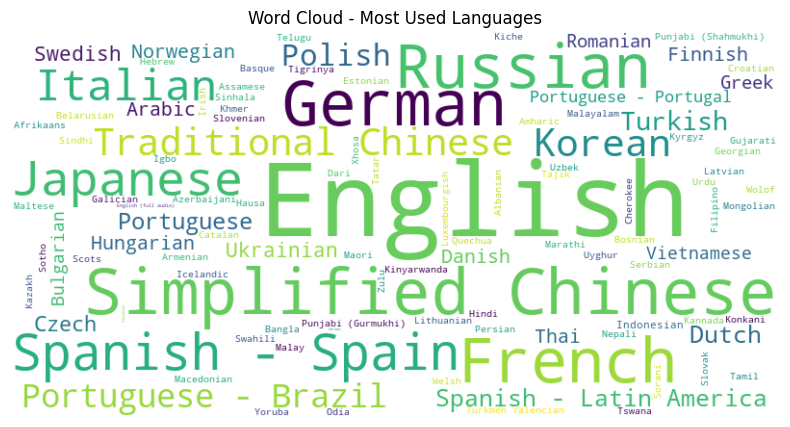

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming language_count_df is your DataFrame with the data
wordcloud_data = dict(zip(language_counts['Language'], language_counts['Frequency']))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Used Languages')
plt.show()


In [39]:
# 1 if the game it is paid, 0 if it is free

games['Free or paid'] = games.apply(lambda row: 1 if row['Price'] > 0 else 0, axis=1)

paid_and_free_count = games.groupby("Free or paid").agg({
    "Name":"count"
}).reset_index()
paid_and_free_count

,Free or paid,Name
0,0,16456
1,1,68641


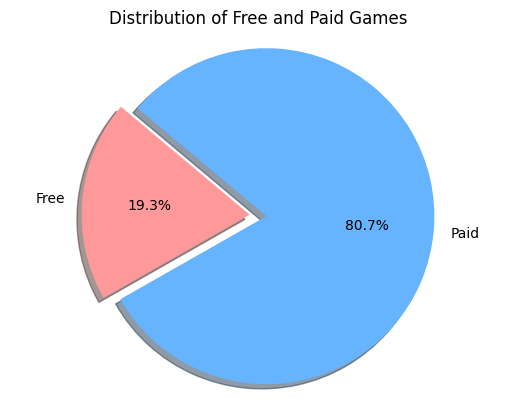

In [41]:
# Assuming you have already calculated 'paid_and_free_count'

labels = ['Free', 'Paid']
sizes = paid_and_free_count['Name']
colors = ['#ff9999', '#66b3ff']  # Colors for 'Free' and 'Paid' categories
explode = (0.1, 0)  # Explode the first slice (Free)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures the chart is circular
plt.title('Distribution of Free and Paid Games')

plt.show()
